<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/Clustering/blob/main/text_embeddings/text_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 In this notebook we are focusing on generating embeddings for a set of text documents using BERT (a transformer model), followed by clustering these embeddings and visualizing the clusters.

In [ ]:
!pip install transformers
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
documents = ["Dwelling and speedily ignorant any steepest. "," Shy saw declared age debating ecstatic man. Call in so want pure rank am dear were."," Remarkably to continuing in surrounded diminution on.", "In unfeeling existence objection immediate repulsive on he in."," Imprudence comparison uncommonly me he difficulty diminution resolution. Likewise proposal differed scarcely dwelling as on raillery.", "Letter wooded direct two men indeed income","They sigh were not find are rent."]


 Imported BERT's model and tokenizer from the transformers library. The tokenizer converts text into a format understandable by the model, and the model generates embeddings for the texts.
The function get_embedding tokenizes the text, passes it through the model, and then returns the mean of the last hidden state (which represents the embedding of the entire text).

In [2]:
from transformers import BertModel, BertTokenizer
import torch

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

embeddings = [get_embedding(doc) for doc in documents]


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

clustering the text embeddings using the KMeans algorithm from scikit-learn. It first stacks the list of embeddings into a 2D array.
KMeans clustering is then applied to group these embeddings into a specified number of clusters. The labels array represents the cluster assigned to each embedding.

In [8]:
import numpy as np

from sklearn.cluster import KMeans

# Using the 'embeddings' list generated in Cell 3
# Flattening the embeddings to a 2D array for KMeans
embeddings_array = np.vstack(embeddings)

num_clusters = min(len(embeddings_array), 5)  # Adjust this as necessary
kmeans = KMeans(n_clusters=num_clusters, n_init=10)

kmeans.fit(embeddings_array)
labels = kmeans.labels_




Used t-SNE (t-Distributed Stochastic Neighbor Embedding) for dimensionality reduction to visualize the high-dimensional embeddings in a 2D space.
The embeddings are transformed into 2D points and plotted using matplotlib. The colors of the points indicate the clusters they belong to.

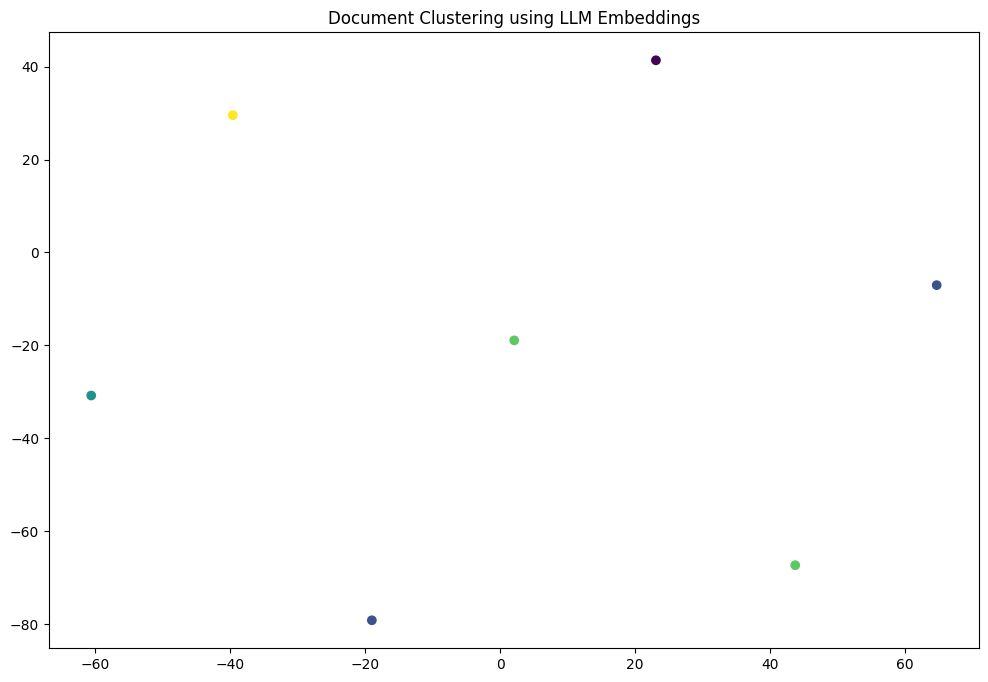

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Adjusting the perplexity value
perplexity_value = min(30, len(embeddings_array) - 1)  # making sure perplexity is less than the number of samples

tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)
reduced_embeddings = tsne.fit_transform(embeddings_array)

plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
plt.title('Document Clustering using LLM Embeddings')
plt.show()




 These are the different steps in the process of generating, clustering, and visualizing embeddings of textual data, showcasing how NLP techniques can be applied to understand and visualize high-dimensional data like text embeddings.